Used for initial analysis. The file used is old and the analysis is also invalid but the code might be useful.

In [2]:
import pandas as pd

In [3]:
cols = ['class', 'transe', 'text', 'complex', 'labEmb', 'textEmb', 'textSubsetEmb', 'absEmb', 'absFirstSentEmb']
indNames = ['class (Amandeep)', 'transe (Amandeep)', 'text (Amandeep)', 'complex (Amandeep)', 'Labels Embedding', 'Text Embedding - 7 props', 'Text Embedding - P279 + P31', 'DBPedia short abstracts', 'DBPedia short abstracts first sentence']

In [4]:
wordSim353AnnotDF_Old = pd.read_csv('../data/wordsim353annotated_old.csv')

In [5]:
wordSim353AnnotDF_New = pd.read_csv('../data/wordsim353LatestAnnot.csv')

In [6]:
wordSim353AnnotDF_Old.head()

,Ind,Word 1,Word 2,DS,HC,NK,FI,Average,complex,transe,text,class,labEmb,textEmb,textSubsetEmb,absEmb,absFirstSentEmb
0,1,admission,ticket,3,3,3,4,3.25,3.611154,4.466324,4.856529,0.000000,6.809672,4.949738,5.145601,4.268633,3.770548
1,2,alcohol,chemistry,4,3,3,4,3.50,3.021635,2.743883,4.793135,0.058511,4.554877,4.818231,3.987047,3.399217,4.168040
2,3,aluminum,metal,2,2,2,3,2.25,6.944618,4.292894,6.267841,3.936571,7.643815,6.407051,5.669631,6.865782,4.997217
3,4,announcement,news,2,2,2,3,2.25,3.248249,3.790767,6.186442,2.088125,7.194899,6.186497,6.186497,2.961755,5.296330
4,5,announcement,warning,3,2,3,3,2.75,3.612144,3.603834,8.638458,8.886211,8.137879,8.556664,9.098408,3.408112,5.621890


In [7]:
wordSim353AnnotDF_New.head()

,ID,Word 1,Word 2,H_Sim,H_Dim,F_Sim,F_Dim,N_Sim,N_Dim,D_Sim,D_Dim,P_Sim,P_Dim,Avg,Stdev,H_orig,H_reversed
0,1,admission,ticket,3,U,3,U,3,U,3,u,3.0,U,3.0,0.000000,5.5360,4.4640
1,2,alcohol,chemistry,3,D,3,D,3,D,4,NaN,3.0,H,3.2,0.447214,4.1250,5.8750
2,3,aluminum,metal,2,I,3,S,2,I,3,i,2.0,I,2.4,0.547723,6.6250,3.3750
3,4,announcement,effort,4,NaN,4,NaN,4,NaN,4,NaN,4.0,NaN,4.0,0.000000,2.0625,7.9375
4,5,announcement,news,2,I,2,I,3,I,2,i,2.0,I,2.2,0.447214,7.1875,2.8125


# Determine Stats

In [8]:
stat1 = wordSim353AnnotDF_Old.copy()

In [9]:
def analyseMetrics(stat1):
    global cols, indNames

    statsDF = []

    for col in cols:
        # Identical part
        identTemp = stat1[stat1['Average'] <= 1.75][col]
        iM = identTemp.mean()
        iS = identTemp.std()

        unrelatedTemp = stat1[stat1['Average'] >= 3.5][col]
        uM = unrelatedTemp.mean()
        uS = unrelatedTemp.std()
        
        midTemp = stat1[(1.75 < stat1['Average']) & (stat1['Average'] < 3.5)][col]
        mM = unrelatedTemp.mean()
        mS = unrelatedTemp.std()

        statsDF.append([iM, mM, uM, iM - uM, iM + uM, iS, mS, uS])
    statsDF = pd.DataFrame(statsDF, index = indNames, columns = ['Average - I', 'Average - M', 'Average - U', 'Average - I-U', 'Average - I+U', 'StdDev - I', 'StdDev - M', 'StdDev - U'])
    return statsDF.sort_values(by=['Average - I-U'], ascending=False)

In [10]:
analyseMetrics(stat1)

,Average - I,Average - M,Average - U,Average - I-U,Average - I+U,StdDev - I,StdDev - M,StdDev - U
class (Amandeep),6.545289,1.160639,1.160639,5.384650,7.705928,4.070360,1.831149,1.831149
DBPedia short abstracts,7.324299,4.128195,4.128195,3.196105,11.452494,2.302197,2.133653,2.133653
DBPedia short abstracts first sentence,7.135948,3.951633,3.951633,3.184315,11.087581,2.404671,1.878835,1.878835
transe (Amandeep),6.187317,3.185329,3.185329,3.001988,9.372647,2.932166,1.708353,1.708353
complex (Amandeep),6.678897,3.921987,3.921987,2.756910,10.600885,2.693491,1.329798,1.329798
Text Embedding - 7 props,7.789926,5.254242,5.254242,2.535684,13.044168,2.461561,1.662520,1.662520
Text Embedding - P279 + P31,7.750934,5.390839,5.390839,2.360095,13.141773,2.386037,1.664989,1.664989
text (Amandeep),7.535097,5.360430,5.360430,2.174667,12.895527,2.933139,1.639719,1.639719
Labels Embedding,7.946882,6.169929,6.169929,1.776954,14.116811,2.035346,1.582738,1.582738


# Merge new annotations and old metrics

In [11]:
wordSimMergedDF = wordSim353AnnotDF_New.set_index(['Word 1', 'Word 2']).join(wordSim353AnnotDF_Old.set_index(['Word 1', 'Word 2']))

In [12]:
wordSimMergedDF = wordSimMergedDF.reset_index()

In [13]:
wordSimMergedDF.labEmb.isna().sum()

0

In [14]:
def labelSamples(score):
    return 'I' if score <= 1.75 else 'U' if score >= 3.5 else 'M'

In [15]:
wordSimMergedDF['category'] = wordSimMergedDF.Avg.apply(labelSamples)

In [16]:
wordSimMergedDFBkp = wordSimMergedDF.copy()

## Change scale of scores

In [17]:
def update_scale(score):
    return 4 - (score) * 3 / 10

In [18]:
for col in cols:
    wordSimMergedDF[col] = wordSimMergedDF[col].apply(update_scale)

In [19]:
wordSimMergedDF.head()

,Word 1,Word 2,ID,H_Sim,H_Dim,F_Sim,F_Dim,N_Sim,N_Dim,D_Sim,...,complex,transe,text,class,labEmb,textEmb,textSubsetEmb,absEmb,absFirstSentEmb,category
0,Arafat,peace,8,3,D,4,NaN,3,U,4,...,3.103668,2.955021,2.534530,3.978657,2.709135,2.588876,2.668504,2.932919,3.009117,U
1,Arafat,terror,9,3,D,4,NaN,3,U,4,...,3.076303,3.747795,2.934640,3.987265,2.745663,3.046814,2.937807,3.247398,3.584387,U
2,FBI,fingerprint,109,3,D,4,NaN,4,NaN,3,...,2.881763,3.104421,2.722262,3.965681,2.179657,2.816739,2.832863,3.178391,3.252778,U
3,FBI,investigation,110,3,U,3,U,3,U,3,...,2.911334,3.149125,2.346065,3.999655,2.512379,2.407004,2.476275,2.402353,3.177374,M
4,Harvard,Yale,137,2,S,3,S,2,S,2,...,2.135042,2.080022,1.226374,1.271662,1.870028,1.301520,1.268170,1.487959,1.405575,M


In [20]:
wordSimMergedDF.category.value_counts()

M    224
U    104
I     21
Name: category, dtype: int64

In [21]:
analyseMetrics(wordSimMergedDF)

,Average - I,Average - M,Average - U,Average - I-U,Average - I+U,StdDev - I,StdDev - M,StdDev - U
Labels Embedding,1.615935,2.149021,2.149021,-0.533086,3.764957,0.610604,0.474821,0.474821
text (Amandeep),1.739471,2.391871,2.391871,-0.652400,4.131342,0.879942,0.491916,0.491916
Text Embedding - P279 + P31,1.674720,2.382748,2.382748,-0.708028,4.057468,0.715811,0.499497,0.499497
Text Embedding - 7 props,1.663022,2.423727,2.423727,-0.760705,4.086750,0.738468,0.498756,0.498756
complex (Amandeep),1.996331,2.823404,2.823404,-0.827073,4.819735,0.808047,0.398939,0.398939
transe (Amandeep),2.143805,3.044401,3.044401,-0.900596,5.188206,0.879650,0.512506,0.512506
DBPedia short abstracts first sentence,1.859216,2.814510,2.814510,-0.955294,4.673726,0.721401,0.563650,0.563650
DBPedia short abstracts,1.802710,2.761542,2.761542,-0.958831,4.564252,0.690659,0.640096,0.640096
class (Amandeep),2.036413,3.651808,3.651808,-1.615395,5.688222,1.221108,0.549345,0.549345


In [22]:
len(wordSimMergedDF)

349

# Stratified Split

## Data Split

In [23]:
from sklearn.model_selection import train_test_split
X = wordSimMergedDF[cols]
Y = wordSimMergedDF['category']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.1, 
                                                    random_state=19)

In [25]:
X_train.head()

,class,transe,text,complex,labEmb,textEmb,textSubsetEmb,absEmb,absFirstSentEmb
20,1.334137,2.918850,1.408463,2.916357,1.558636,1.433001,1.270478,2.977566,2.313433
149,3.959855,3.137178,2.662989,3.256807,1.405574,2.641012,2.641012,2.994895,2.523780
223,3.789260,2.577913,2.584808,2.625197,2.132757,2.667512,2.727592,2.587481,2.908610
181,3.997609,3.379192,4.000000,2.957218,4.000000,4.000000,4.000000,4.000000,4.000000
250,3.901682,2.414060,2.662876,2.683717,2.491675,2.525770,2.595170,1.872327,2.476093


In [26]:
Y_train.value_counts()

M    201
U     94
I     19
Name: category, dtype: int64

In [27]:
Y_test.value_counts()

M    23
U    10
I     2
Name: category, dtype: int64

## SVM Training and Testing

In [28]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))

In [29]:
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', random_state=100))])

In [30]:
preds = clf.predict(X_test)
preds

array(['M', 'M', 'M', 'I', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'U', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'U', 'M'], dtype=object)

## Results

In [31]:
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

In [32]:
accuracy_score(preds, Y_test)

0.6857142857142857

In [33]:
Y_test.value_counts()

M    23
U    10
I     2
Name: category, dtype: int64

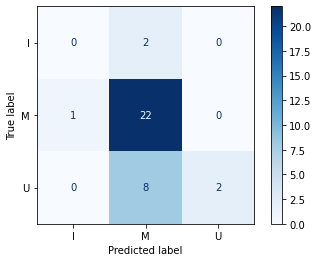

In [34]:
plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=clf.classes_,
                                 cmap=plt.cm.Blues)

In [35]:
X_test.head()

,class,transe,text,complex,labEmb,textEmb,textSubsetEmb,absEmb,absFirstSentEmb
161,2.550722,3.110214,3.049062,3.092837,2.061545,2.943750,3.050729,2.721214,2.462581
299,3.883358,2.796661,2.143449,2.835941,1.841262,2.143459,2.143459,1.841262,1.841262
57,3.335357,3.782758,2.397896,3.467046,1.874207,2.414705,2.329012,3.391344,3.015135
127,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
175,3.491651,3.102310,2.709157,3.088045,2.322339,2.764514,2.662755,3.305087,3.157234


In [36]:
tempVals = []
for col in cols:
    tempVals.append(accuracy_score(Y_test, X_test[col].apply(labelSamples)))
(pd.DataFrame(tempVals, index = indNames, columns = ['Accuracy (in %) compared to annotated category']) * 100).sort_values(by=['Accuracy (in %) compared to annotated category'], ascending=False)

,Accuracy (in %) compared to annotated category
DBPedia short abstracts,62.857143
DBPedia short abstracts first sentence,62.857143
Labels Embedding,60.000000
complex (Amandeep),57.142857
text (Amandeep),54.285714
Text Embedding - 7 props,54.285714
Text Embedding - P279 + P31,54.285714
class (Amandeep),51.428571
transe (Amandeep),45.714286


In [37]:
tempVals = []
for col in cols:
    clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
    clf1.fit(X_train[[col]], Y_train)
    tempVals.append(accuracy_score(Y_test, clf1.predict(X_test[[col]])))
(pd.DataFrame(tempVals, index = indNames, columns = ['Accuracy (in %) compared to annotated category']) * 100).sort_values(by=['Accuracy (in %) compared to annotated category'], ascending=False)

,Accuracy (in %) compared to annotated category
Text Embedding - 7 props,68.571429
class (Amandeep),65.714286
text (Amandeep),65.714286
DBPedia short abstracts first sentence,65.714286
transe (Amandeep),62.857143
complex (Amandeep),62.857143
Labels Embedding,62.857143
Text Embedding - P279 + P31,62.857143
DBPedia short abstracts,62.857143


# Stratified K-fold split


## Data Split

In [38]:
from sklearn.model_selection import StratifiedKFold
X = wordSimMergedDF[cols]
Y = wordSimMergedDF['category']

In [39]:
skf = StratifiedKFold(n_splits=5, random_state=19, shuffle=True)
X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
for train_index, test_index in skf.split(X, Y):
    X_train_splits.append(X.iloc[train_index])
    X_test_splits.append(X.iloc[test_index])
    Y_train_splits.append(Y.iloc[train_index])
    Y_test_splits.append(Y.iloc[test_index])

In [40]:
X_train_splits[0].head()

,class,transe,text,complex,labEmb,textEmb,textSubsetEmb,absEmb,absFirstSentEmb
0,3.978657,2.955021,2.534530,3.103668,2.709135,2.588876,2.668504,2.932919,3.009117
1,3.987265,3.747795,2.934640,3.076303,2.745663,3.046814,2.937807,3.247398,3.584387
3,3.999655,3.149125,2.346065,2.911334,2.512379,2.407004,2.476275,2.402353,3.177374
4,1.271662,2.080022,1.226374,2.135042,1.870028,1.301520,1.268170,1.487959,1.405575
5,1.282710,2.496058,2.230036,2.408249,2.101260,2.163500,2.210558,3.292768,2.728319


## SVM Training and Testing

In [41]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

In [42]:
preds = []
for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
    clf.fit(X_train1, Y_train1)
    preds.append(clf.predict(X_test1))

## Results

In [43]:
acc = 0
for pred, Y_test1 in zip(preds, Y_test_splits):
    acc += accuracy_score(pred, Y_test1)
acc/5

0.6445962732919255

In [44]:
tempVals = []
for col in cols:
    tempVals.append(accuracy_score(Y_test, X_test[col].apply(labelSamples)))
(pd.DataFrame(tempVals, index = indNames, columns = ['Accuracy (in %) compared to annotated category']) * 100).sort_values(by=['Accuracy (in %) compared to annotated category'], ascending=False)

,Accuracy (in %) compared to annotated category
DBPedia short abstracts,62.857143
DBPedia short abstracts first sentence,62.857143
Labels Embedding,60.000000
complex (Amandeep),57.142857
text (Amandeep),54.285714
Text Embedding - 7 props,54.285714
Text Embedding - P279 + P31,54.285714
class (Amandeep),51.428571
transe (Amandeep),45.714286


In [45]:
tempVals = []
for col in cols:
    preds = []
    for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
        clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
        clf1.fit(X_train1[[col]], Y_train1)
        preds.append(clf1.predict(X_test1[[col]]))
    acc = 0
    for pred, Y_test1 in zip(preds, Y_test_splits):
        acc += accuracy_score(pred, Y_test1)
    tempVals.append(acc/5)
(pd.DataFrame(tempVals, index = indNames, columns = ['Accuracy (in %) compared to annotated category']) * 100).sort_values(by=['Accuracy (in %) compared to annotated category'], ascending=False)

,Accuracy (in %) compared to annotated category
Text Embedding - 7 props,67.337474
text (Amandeep),66.757764
complex (Amandeep),64.467909
class (Amandeep),63.896480
transe (Amandeep),63.896480
DBPedia short abstracts,63.896480
Text Embedding - P279 + P31,63.614907
Labels Embedding,63.325052
DBPedia short abstracts first sentence,61.590062


# Stratified 15-fold split


## Data Split

In [81]:
from sklearn.model_selection import StratifiedKFold
X = wordSimMergedDF[cols]
Y = wordSimMergedDF['category']

In [82]:
skf = StratifiedKFold(n_splits=15, random_state=19, shuffle=True)
X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
for train_index, test_index in skf.split(X, Y):
    X_train_splits.append(X.iloc[train_index])
    X_test_splits.append(X.iloc[test_index])
    Y_train_splits.append(Y.iloc[train_index])
    Y_test_splits.append(Y.iloc[test_index])

In [83]:
X_train_splits[0].head()

,class,transe,text,complex,labEmb,textEmb,textSubsetEmb,absEmb,absFirstSentEmb
0,3.978657,2.955021,2.534530,3.103668,2.709135,2.588876,2.668504,2.932919,3.009117
1,3.987265,3.747795,2.934640,3.076303,2.745663,3.046814,2.937807,3.247398,3.584387
2,3.965681,3.104421,2.722262,2.881763,2.179657,2.816739,2.832863,3.178391,3.252778
3,3.999655,3.149125,2.346065,2.911334,2.512379,2.407004,2.476275,2.402353,3.177374
4,1.271662,2.080022,1.226374,2.135042,1.870028,1.301520,1.268170,1.487959,1.405575


## SVM Training and Testing

In [84]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

In [85]:
preds = []
for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
    clf.fit(X_train1, Y_train1)
    preds.append(clf.predict(X_test1))

## Results

In [86]:
acc = 0
for pred, Y_test1 in zip(preds, Y_test_splits):
    acc += accuracy_score(pred, Y_test1)
acc/15

0.656159420289855

In [87]:
tempVals = []
for col in cols:
    tempVals.append(accuracy_score(Y_test, X_test[col].apply(labelSamples)))
(pd.DataFrame(tempVals, index = indNames, columns = ['Accuracy (in %) compared to annotated category']) * 100).sort_values(by=['Accuracy (in %) compared to annotated category'], ascending=False)

,Accuracy (in %) compared to annotated category
DBPedia short abstracts,62.857143
DBPedia short abstracts first sentence,62.857143
Labels Embedding,60.000000
complex (Amandeep),57.142857
text (Amandeep),54.285714
Text Embedding - 7 props,54.285714
Text Embedding - P279 + P31,54.285714
class (Amandeep),51.428571
transe (Amandeep),45.714286


In [88]:
tempVals = []
for col in cols:
    preds = []
    for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
        clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
        clf1.fit(X_train1[[col]], Y_train1)
        preds.append(clf1.predict(X_test1[[col]]))
    acc = 0
    for pred, Y_test1 in zip(preds, Y_test_splits):
        acc += accuracy_score(pred, Y_test1)
    tempVals.append(acc/15)
(pd.DataFrame(tempVals, index = indNames, columns = ['Accuracy (in %) compared to annotated category']) * 100).sort_values(by=['Accuracy (in %) compared to annotated category'], ascending=False)

,Accuracy (in %) compared to annotated category
Text Embedding - 7 props,66.473430
text (Amandeep),66.171498
transe (Amandeep),65.048309
complex (Amandeep),65.048309
Labels Embedding,64.480676
Text Embedding - P279 + P31,63.913043
class (Amandeep),63.623188
DBPedia short abstracts,63.623188
DBPedia short abstracts first sentence,61.026570


# Determine Entropy Values

In [46]:
from scipy.stats import entropy

In [47]:
wordSimMergedDF.head()

,Word 1,Word 2,ID,H_Sim,H_Dim,F_Sim,F_Dim,N_Sim,N_Dim,D_Sim,...,complex,transe,text,class,labEmb,textEmb,textSubsetEmb,absEmb,absFirstSentEmb,category
0,Arafat,peace,8,3,D,4,NaN,3,U,4,...,3.103668,2.955021,2.534530,3.978657,2.709135,2.588876,2.668504,2.932919,3.009117,U
1,Arafat,terror,9,3,D,4,NaN,3,U,4,...,3.076303,3.747795,2.934640,3.987265,2.745663,3.046814,2.937807,3.247398,3.584387,U
2,FBI,fingerprint,109,3,D,4,NaN,4,NaN,3,...,2.881763,3.104421,2.722262,3.965681,2.179657,2.816739,2.832863,3.178391,3.252778,U
3,FBI,investigation,110,3,U,3,U,3,U,3,...,2.911334,3.149125,2.346065,3.999655,2.512379,2.407004,2.476275,2.402353,3.177374,M
4,Harvard,Yale,137,2,S,3,S,2,S,2,...,2.135042,2.080022,1.226374,1.271662,1.870028,1.301520,1.268170,1.487959,1.405575,M


In [48]:
def findEntropy(row, minDims=1):
    dims = {'U': 0, 'A': 0, 'H': 0, 'I': 0, 'S': 0, 'D': 0, 'L': 0, 'X': 0}
    cols = ['H_Dim', 'F_Dim', 'N_Dim', 'D_Dim', 'P_Dim']
    for col in cols:
        try:
            if row[col] == 'O':
                row[col] = 'D'
            if type(row[col]) == str and len(row[col]) > 1:
                row[col] = row[col][:1]
            if not(pd.isna(row[col])):
                dims[row[col].upper()] += 1
            else:
                dims['X'] += 1
        except:
            print(f"Failed while processing value {row[col]}")
            dims['X'] += 1
    probArr = [dims[val]/5 for val in ['U', 'A', 'H', 'I', 'S', 'D', 'L', 'X']]
    
    cntDims = sum([dims[val] for val in ['U', 'A', 'H', 'I', 'S', 'D', 'L']])
    
    assert sum(probArr) == 1
    
    if cntDims >= minDims:
        return probArr + [cntDims, entropy(probArr, base=2)]

    else:
        return [0]*5 + [cntDims, None]

In [49]:
dimMapp = {'U': 0, 'A': 0, 'H': 0, 'I': 0, 'S': 0, 'D': 0, 'L': 0}
print(f"No. of anomalies for each annotator: {[wordSimMergedDF[col].apply(lambda p: not(pd.isna(p)) and type(p) == str and p.upper() not in dimMapp).sum() for col in ['H_Dim', 'F_Dim', 'N_Dim', 'D_Dim', 'P_Dim']]}")

No. of anomalies for each annotator: [1, 2, 2, 1, 1]


In [50]:
t = [wordSimMergedDF[col].unique() for col in ['H_Dim', 'F_Dim', 'N_Dim', 'D_Dim', 'P_Dim']]
dimValsList = [item for sublist in t for item in sublist]
print(f"Unique list of dimension values: {set([char1.upper() for char1 in dimValsList if type(char1) == str ])}")

Unique list of dimension values: {'A, D', 'S, H', 'D', 'P', 'S', 'A', 'H', '2', 'L', 'U', 'O', 'I', '1'}


In [51]:
wordSimMergedDFEntropy = pd.DataFrame(wordSimMergedDF.apply(findEntropy,axis=1).to_list(), columns = ['U', 'A', 'H', 'I', 'S', 'D', 'L', 'X', 'countDims', 'Entropy'])

Failed while processing value P
Failed while processing value P
Failed while processing value 1
Failed while processing value 2


In [52]:
wordSimMergedDFEntropy.describe()

,U,A,H,I,S,D,L,X,countDims,Entropy
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,286.000000,286.000000,286.000000,286.000000
mean,0.059599,0.018338,0.108309,0.130659,0.108309,0.151862,0.041259,0.254545,3.727273,0.982808
std,0.160104,0.107781,0.209720,0.273136,0.255210,0.224321,0.146457,0.285000,1.424999,0.563678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.721928
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,4.000000,0.970951
75%,0.000000,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000,0.400000,5.000000,1.370951
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,5.000000,2.321928


In [53]:
wordSimMergedDFEntropy.head()

,U,A,H,I,S,D,L,X,countDims,Entropy
0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.6,2.0,1.370951
1,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.6,2.0,1.370951
2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.6,2.0,1.370951
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.000000


## Dimension counts analysis

In [54]:
def countDimensions1(row, minDims=1):
    dims = {'U': 0, 'A': 0, 'H': 0, 'I': 0, 'S': 0, 'D': 0, 'L': 0, 'X': 0}
    cols = ['H_Dim', 'F_Dim', 'N_Dim', 'D_Dim', 'P_Dim']
    for col in cols:
        try:
            if row[col] == 'O':
                row[col] = 'D'
            if type(row[col]) == str and len(row[col]) > 1:
                row[col] = row[col][:1]
            if not(pd.isna(row[col])):
                dims[row[col].upper()] += 1
            else:
                dims['X'] += 1
        except:
            print(f"Failed while processing value {row[col]}")
            dims['X'] += 1
    probArr = [dims[val] for val in ['U', 'A', 'H', 'I', 'S', 'D', 'L', 'X']]
    
    return probArr

In [55]:
wordSimMergedDF_dimCount = pd.DataFrame(wordSimMergedDF.apply(countDimensions1,axis=1).to_list(), columns = ['U', 'A', 'H', 'I', 'S', 'D', 'L', 'X'])

Failed while processing value P
Failed while processing value P
Failed while processing value 1
Failed while processing value 2


In [56]:
wordSimMergedDF_dimCount.describe()

,U,A,H,I,S,D,L,X
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.297994,0.091691,0.541547,0.653295,0.541547,0.759312,0.169054,1.945559
std,0.800518,0.538906,1.048600,1.365680,1.276048,1.121604,0.667440,1.929777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [57]:
wordSimMergedDF_dimCount.sum()

U    104
A     32
H    189
I    228
S    189
D    265
L     59
X    679
dtype: int64

# Correlation between Entropy Values and Scores

In [58]:
import scipy.stats as stats

In [59]:
wordSimMergedDFEntropy1 = wordSimMergedDFEntropy.copy()

In [60]:
# wordSimMergedDF_WEntropy.set_index(['Word 1', 'Word 2']).loc[('announcement', 'effort')]

In [61]:
wordSimMergedDF_WEntropy = wordSimMergedDF.join(wordSimMergedDFEntropy1)

In [62]:
print(f"Dataset is being reduced from {len(wordSimMergedDF_WEntropy)} to {len(wordSimMergedDF_WEntropy[~wordSimMergedDF_WEntropy.Entropy.isna()])}")

Dataset is being reduced from 349 to 286


In [63]:
wordSimMergedDF_WEntropy = wordSimMergedDF_WEntropy[~wordSimMergedDF_WEntropy.Entropy.isna()]

In [64]:
stats.spearmanr(wordSimMergedDF_WEntropy.Entropy, wordSimMergedDF_WEntropy.Avg)


SpearmanrResult(correlation=0.22386618257947485, pvalue=0.00013458813322992746)

In [65]:
wordSimMergedDF_WEntropy.category.value_counts()

M    224
U     51
I     11
Name: category, dtype: int64

In [66]:
cat1 = 'I'
stats.spearmanr(wordSimMergedDF_WEntropy[wordSimMergedDF_WEntropy.category == cat1].Entropy, wordSimMergedDF_WEntropy[wordSimMergedDF_WEntropy.category == cat1].Avg)



SpearmanrResult(correlation=0.634273174149212, pvalue=0.03608419202831131)

In [67]:
cat1 = 'U'
stats.spearmanr(wordSimMergedDF_WEntropy[wordSimMergedDF_WEntropy.category == cat1].Entropy, wordSimMergedDF_WEntropy[wordSimMergedDF_WEntropy.category == cat1].Avg)



SpearmanrResult(correlation=-0.8140674774414028, pvalue=3.766571866164227e-13)

In [68]:
cat1 = 'M'
stats.spearmanr(wordSimMergedDF_WEntropy[wordSimMergedDF_WEntropy.category == cat1].Entropy, wordSimMergedDF_WEntropy[wordSimMergedDF_WEntropy.category == cat1].Avg)



SpearmanrResult(correlation=0.4724114239021895, pvalue=7.472630212984452e-14)

# Correlation between Entropy Values and Scores

In [69]:
wordSimMergedDFEntropy2 = pd.DataFrame(wordSimMergedDF.apply(findEntropy,axis=1, args=(3,)).to_list(), columns = ['U', 'A', 'H', 'I', 'S', 'D', 'L', 'X', 'countDims', 'Entropy'])

Failed while processing value P
Failed while processing value P
Failed while processing value 1
Failed while processing value 2


In [70]:
wordSimMergedDFEntropy2.describe()

,U,A,H,I,S,D,L,X,countDims,Entropy
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,219.000000,219.000000,219.000000,219.000000
mean,0.053868,0.016619,0.101433,0.113467,0.102579,0.425215,0.050228,0.119635,4.401826,0.988119
std,0.158543,0.106453,0.209332,0.271155,0.254430,0.617601,0.164338,0.158340,0.791698,0.626279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.721928
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.970951
75%,0.000000,0.000000,0.200000,0.000000,0.000000,0.600000,0.000000,0.200000,5.000000,1.521928
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.400000,5.000000,2.321928


In [71]:
wordSimMergedDFEntropy2.head()

,U,A,H,I,S,D,L,X,countDims,Entropy
0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0


In [72]:
# wordSimMergedDF_WEntropy.set_index(['Word 1', 'Word 2']).loc[('announcement', 'effort')]

In [73]:
wordSimMergedDF_WEntropy2 = wordSimMergedDF.join(wordSimMergedDFEntropy2)

In [74]:
print(f"Dataset is being reduced from {len(wordSimMergedDF_WEntropy)} to {len(wordSimMergedDF_WEntropy2[~wordSimMergedDF_WEntropy2.Entropy.isna()])}")

Dataset is being reduced from 286 to 219


In [75]:
wordSimMergedDF_WEntropy2 = wordSimMergedDF_WEntropy2[~wordSimMergedDF_WEntropy2.Entropy.isna()]

In [76]:
stats.spearmanr(wordSimMergedDF_WEntropy2.Entropy, wordSimMergedDF_WEntropy2.Avg)


SpearmanrResult(correlation=0.4630150942094212, pvalue=4.909163356811773e-13)

In [77]:
wordSimMergedDF_WEntropy2.category.value_counts()

M    216
I      3
Name: category, dtype: int64

In [78]:
cat1 = 'I'
stats.spearmanr(wordSimMergedDF_WEntropy2[wordSimMergedDF_WEntropy2.category == cat1].Entropy, wordSimMergedDF_WEntropy2[wordSimMergedDF_WEntropy2.category == cat1].Avg)



/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)

In [79]:
cat1 = 'U'
stats.spearmanr(wordSimMergedDF_WEntropy2[wordSimMergedDF_WEntropy2.category == cat1].Entropy, wordSimMergedDF_WEntropy2[wordSimMergedDF_WEntropy2.category == cat1].Avg)



SpearmanrResult(correlation=nan, pvalue=nan)

In [80]:
cat1 = 'M'
stats.spearmanr(wordSimMergedDF_WEntropy2[wordSimMergedDF_WEntropy2.category == cat1].Entropy, wordSimMergedDF_WEntropy2[wordSimMergedDF_WEntropy2.category == cat1].Avg)



SpearmanrResult(correlation=0.48264071045505, pvalue=5.282364887488181e-14)